# Organizing clusters as a hierarchical tree
<html>
<h3> An alternative approach to prototype-based clustering: hierarchical clustering. </h3>

<h3> Advantage of hierarchical clustering algorithms</h3>
<li> It allows us to plot dendrograms, which can help with the interpretation of the results by creating meaningful taxonomies.
<li> we do not need to specify the number of clusters upfront.

<h3> Two main approaches of hierarchical clustering </h3>
<ul>
<li> <b>Divisive:</b>
    <ul>
        <li>we start with one cluster that encompasses all our samples
        <li>we iteratively split the cluster into smaller clusters
        <li> Repeat step 2 until each cluster only contains one sample.
    </ul>
</li>

<li> <b>Agglomerative:</b> It takes the opposite approach compared to divisive. 
<ol> <li>We start with each sample as an individual cluster
<li> Merge the closest pairs of clusters until only one cluster remains.
</ol>
</ul>
<html>

<h3>Agglomerative clustering:</h3>
The two standard algorithms for agglomerative hierarchical clustering are:
<ul>
<li><b>single linkage: </b> we compute the distances between the most similar members for each pair of clusters and merge the two clusters for which the distance between the most similar members is the smallest.
<li><b>complete linkage</b>. The complete linkage approach is similar to single linkage but, instead of comparing the most similar members in each pair of clusters, we compare the most dissimilar members to perform the merge.
</ul>

<h3> Complete Linkage</h3>
Let's focus on complete linkage in this section. This is an iterative procedure that can be summarized by the following steps:
<ol>
<li>Compute the distance matrix of all samples.
<li>Represent each data point as a singleton cluster.
<li>Merge the two closest clusters based on the distance of the most dissimilar (distant) members.
<li>Update the similarity matrix.
<li>Repeat steps 2 to 4 until one single cluster remains.
</ol>

<h3> Let's generate random data to try out complete linkage </h3>
</html>

Input:
             X         Y         Z
ID_0  6.964692  2.861393  2.268515
ID_1  5.513148  7.194690  4.231065
ID_2  9.807642  6.848297  4.809319
ID_3  3.921175  3.431780  7.290497
ID_4  4.385722  0.596779  3.980443

Distance matrix: 
          ID_0      ID_1      ID_2      ID_3      ID_4
ID_0  0.000000  4.973534  5.516653  5.899885  3.835396
ID_1  4.973534  0.000000  4.347073  5.104311  6.698233
ID_2  5.516653  4.347073  0.000000  7.244262  8.316594
ID_3  5.899885  5.104311  7.244262  0.000000  4.382864
ID_4  3.835396  6.698233  8.316594  4.382864  0.000000

Linkage Matrix:
           row label 1  row label 2  distance  no. of items in clust.
cluster 1          0.0          4.0  3.835396                     2.0
cluster 2          1.0          2.0  4.347073                     2.0
cluster 3          3.0          5.0  5.899885                     3.0
cluster 4          6.0          7.0  8.316594                     5.0


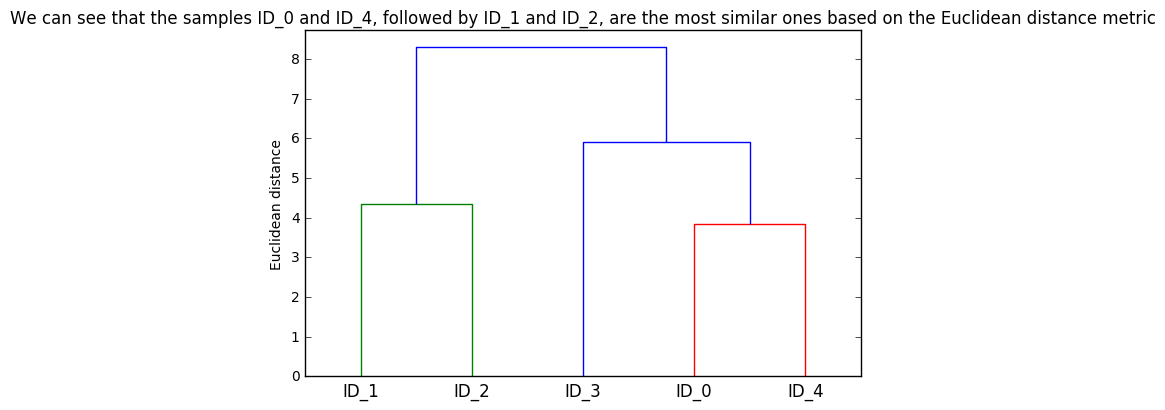

In [25]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# random data
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
print "Input:\n", df

# compute distance matrix using pdist
row_dist = pd.DataFrame(squareform(
        pdist(df, metric='euclidean')), 
                        columns=labels, index=labels)

# squareform function is used to create a symmetrical matrix of the pair-wise distances as shown below
print "\nDistance matrix: \n", row_dist

# apply the complete linkage agglomeration to our clusters and compute linkage matrix
# above row_clusters, doesnt use row_dist because linkage needs condensed matrix. 
# row_dist was only for us to get a feel of symmetrical distance matrix
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

# OR another correct way to do linkage is as follows:
# row_clusters = linkage(df.values, method='complete', metric='euclidean')

# turn linkage matrix (row_cluster) into dataframe
linkage_matrix = pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])
print "\nLinkage Matrix:\n", linkage_matrix

# plot dendogram of linkage matrix
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.title('We can see that the samples ID_0 and ID_4, followed by ID_1 and ID_2, are the most similar ones based on the Euclidean distance metric')
plt.show()


# Associate dendogram with heat map

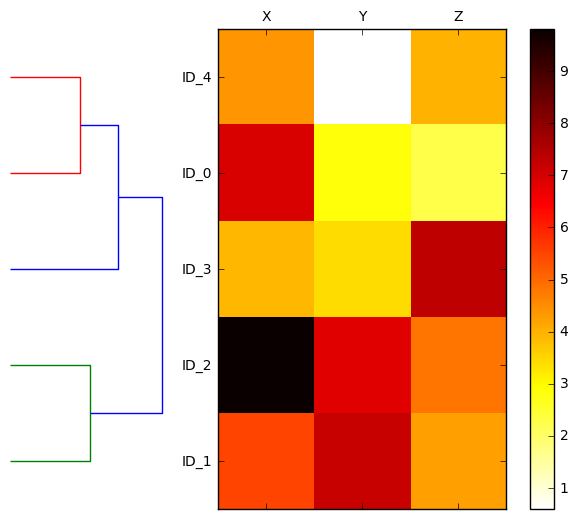

In [24]:
# First, we create a new figure object
# Define the x axis position, y axis position, width, and height of the dendrogram via the add_axes attribute.
# Furthermore, we rotate the dendrogram 90 degrees counter-clockwise.
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='right')

#print row_dendr['leaves'], row_dendr['leaves'][::-1]

# reorder the data in our initial DataFrame according to the clustering labels 
# that can be accessed from the dendrogram object
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

# construct the heat map from the reordered DataFrame and position it right next to the dendrogram
axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

# Remove axis bars on dendogram. Add colorbar and ticks to heat map.
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

# Let's try scikit's agglomeration

In [30]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)
# print ac.get_params()
# ac = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='complete')
# labels = ac.fit_predict(X)
# print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]
{'compute_full_tree': 'auto', 'n_clusters': 2, 'connectivity': None, 'affinity': 'euclidean', 'memory': Memory(cachedir=None), 'pooling_func': <function mean at 0x1059397d0>, 'linkage': 'complete'}
Cluster labels: [0 0 0 0 0]


In [ ]:
Q&A:
    - Dendogram analysis!???
    - How to tell #clusters formed looking at dendogram???
    - Heat map association to dendogram???
    - How to quantify AgglomerativeClustering? Also whts the point if we are giving num_clusters?? How to measure #clusters=2 vs 3 results??